<a href="https://colab.research.google.com/github/FGalvao77/Classificador-de-DIABETES/blob/main/Classificador_de_DIABETES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificador de `DIABETES`**

---



## **Aplicando técnicas de aprendizado de máquinas**


  ![](https://media0.giphy.com/media/JWuBH9rCO2uZuHBFpm/200.gif)



In [1]:
# importando o conjunto de dados
!wget 'https://raw.githubusercontent.com/FGalvao77/datasets/main/diabetes.csv'

--2022-01-31 22:11:41--  https://raw.githubusercontent.com/FGalvao77/datasets/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.001s  

2022-01-31 22:11:41 (17.5 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [1]:
# visualizando o conjunto de dados
!head diabetes.csv

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [2]:
# importando biblioteca para ignorar mensagens de alertas
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importando biblioteca para manipulação e análise de dados
import pandas as pd

> <font size=6>`Saiba mais!`</font><br><br>
✅ [Wikipedia](https://pt.wikipedia.org/wiki/Pandas_(software))<br>
✅ [Site oficial](https://pandas.pydata.org/)

### **1. Análise exploratória dos dados**

In [4]:
# instaciando o conjunto de dados no objeto "df"
df = pd.read_csv('diabetes.csv', 
                 sep=',')

In [5]:
# visualizando as 5 primeiras linhas
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# verificando a dimensão do conjunto de dados
df.shape    # linhas e colunas

(768, 9)

In [7]:
# verificando se há valores nulos
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

> No conjunto de dados, para valores nulos e/ou faltantes foram imputados valores `0` (zero).

Portanto para manter um autenticidade do conujunto de dados, irei realizar outras técnicas na imputação de dados.

In [8]:
# criando uma cópia do conjunto de dados para não sobrescrever o conjunto de dados importado
df2 = df.copy()

In [9]:
# nome dos atributos
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

![](https://mir-s3-cdn-cf.behance.net/project_modules/disp/4f668299557129.5ef609b6a7aa1.gif)

### **2. Tratamento dos dados**

In [10]:
# instanciando o nome dos atributos de interesse
cols = df2.columns[1:-1]    # excluindo o atributo alvo
cols    # visualizando os atributos selecionados

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [11]:
# importando biblioteca de alto nível para funções matemáticas
import numpy as np

> <font size=6>`Saiba mais!`</font><br><br>
✅ [Wikipedia](https://pt.wikipedia.org/wiki/NumPy)<br>
✅ [Site oficial](https://numpy.org/)

In [12]:
# imputando valores "NaN" nos campos com valores 0 (zero) nos atributos de interesses
df2[cols] = df2[cols].replace(0, np.NaN)  

# realizando a contagem de NaN's
print(df2.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [20]:
# # imputando valores "NaN" nos campos com valores 0 (zero) nos atributos de interesses
# df2[[
#      'Glucose', 'BloodPressure', 
#      'SkinThickness', 'Insulin', 'BMI'
#      ]] = df2[[
#                'Glucose', 'BloodPressure', 
#                'SkinThickness', 'Insulin','BMI']].replace(0, np.NaN)  

# # realizando a contagem de NaN's
# print(df2.isnull().sum())

In [13]:
# aplicando a média nos valores "NaN" do atributo "Glucose"
df2['Glucose'].fillna(df2['Glucose'].mean(), inplace=True) 

# aplicando a média nos valores "NaN" do atributo "BloodPressure"
df2['BloodPressure'].fillna(df2['BloodPressure'].mean(), inplace=True) 

# aplicando a mediana nos valores "NaN" do atributo "SkinThickness"
df2['SkinThickness'].fillna(df2['SkinThickness'].median(), inplace=True) 

# aplicando a mediana nos valores "NaN" do atributo "Insulin"
df2['Insulin'].fillna(df2['Insulin'].median(), inplace=True) 

# aplicando a mediana nos valores "NaN" do atributo "'BMI"
df2['BMI'].fillna(df2['BMI'].median(), inplace=True)

In [14]:
# informações gerais
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [15]:
# verificando se há valores duplicados
df2.duplicated().sum()

0

In [17]:
# se houver valores duplicados podemos elimina-los conforme segue a linha de código abaixo
df2.drop_duplicates(inplace=True)

In [18]:
# estatítica descritiva do conjunto de dados
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


In [19]:
# visualizando a distribuição dos dados do atributo alvo (Outcome)
print(
    df2['Outcome'].value_counts(),
    round(df2['Outcome'].value_counts(normalize=True), 5) * 100,
    sep='\n\n'
)

0    500
1    268
Name: Outcome, dtype: int64

0    65.104
1    34.896
Name: Outcome, dtype: float64


### **3. Visualização dos dados**

In [20]:
# importando biblioteca para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

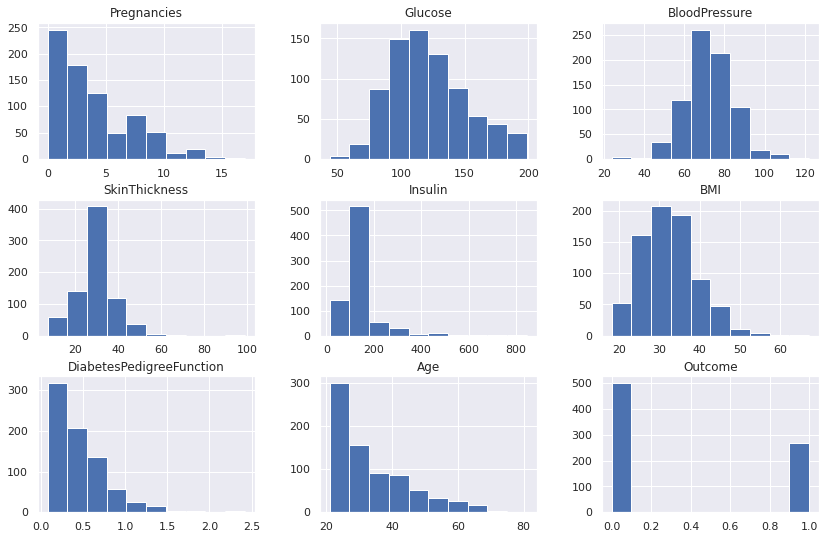

In [21]:
# visualização da distribuição dos dados com gráfico de histograma após tratamento dos valores "NaN's"
df2.hist(figsize=(14,9));

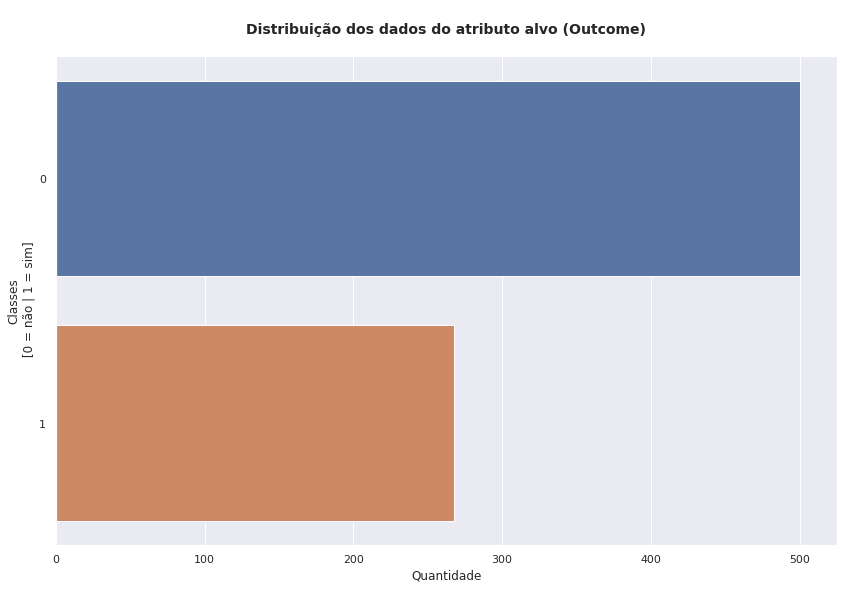

In [22]:
# gráfico da distribuição das observações do atributo alvo
plt.figure(figsize=(14,9))

plt.title('\nDistribuição dos dados do atributo alvo (Outcome)\n', 
          {'fontsize': 14, 'fontweight': 'bold'})
sns.countplot(data=df2, y='Outcome')
plt.ylabel('Classes\n [0 = não | 1 = sim]')
plt.xlabel('Quantidade');

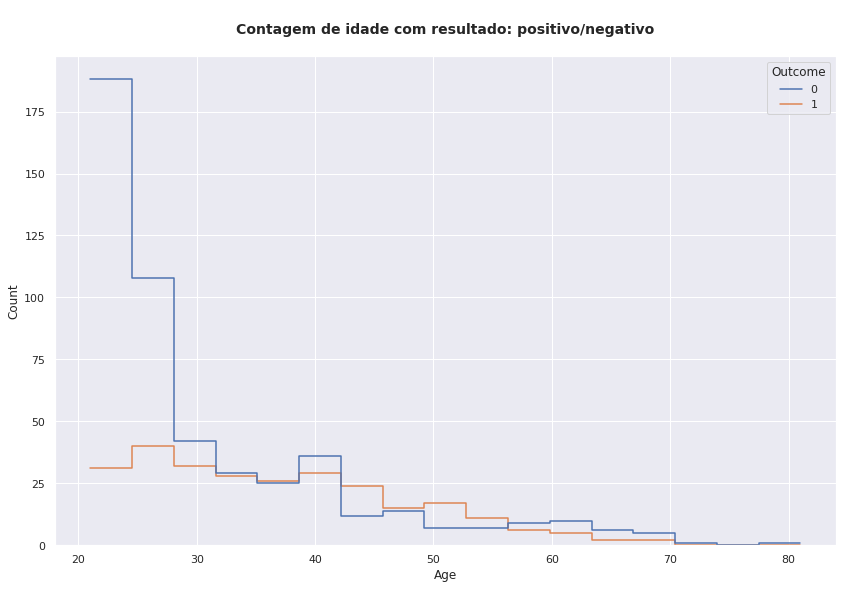

In [23]:
# gráfico da contagem da idade por resultado (Outcome)
plt.figure(figsize=(14,9))

plt.title('\nContagem de idade com resultado: positivo/negativo\n', 
          {'fontsize': 14,'fontweight': 'bold'})
sns.histplot(data=df2, x='Age', hue='Outcome', element= 'step', fill=False);

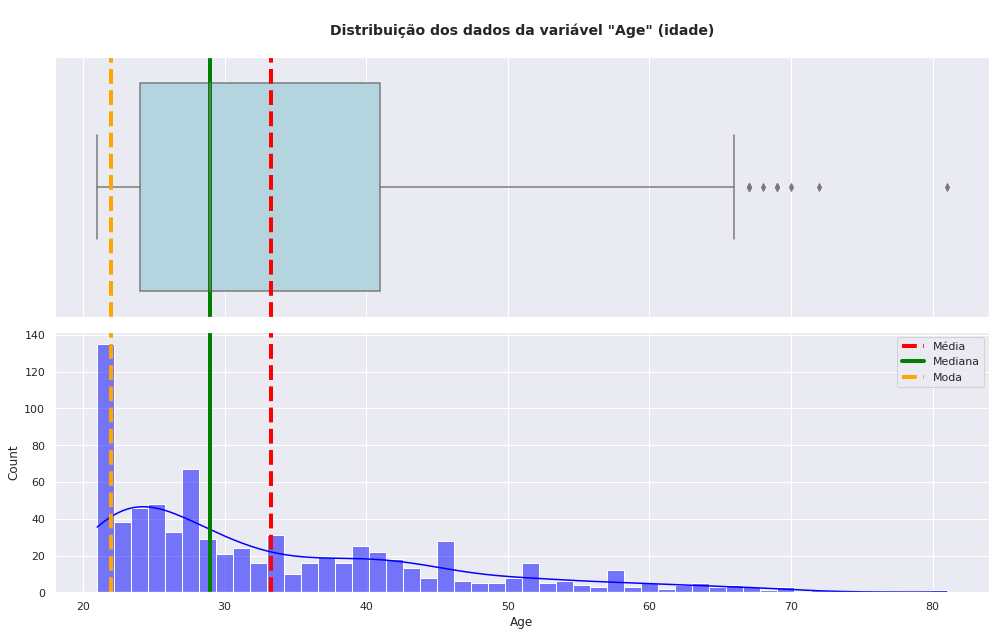

In [24]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Age" (idade)
mean = df2['Age'].mean()
median = df2['Age'].median()
mode = df2['Age'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(14,9))

sns.boxplot(data=df2, x='Age', ax=ax_box, color='lightblue')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "Age" (idade)\n',
                 {'fontsize': 14,'fontweight': 'bold'})

sns.histplot(data=df2, x='Age', ax=ax_hist, kde=True, bins=50, color='blue')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

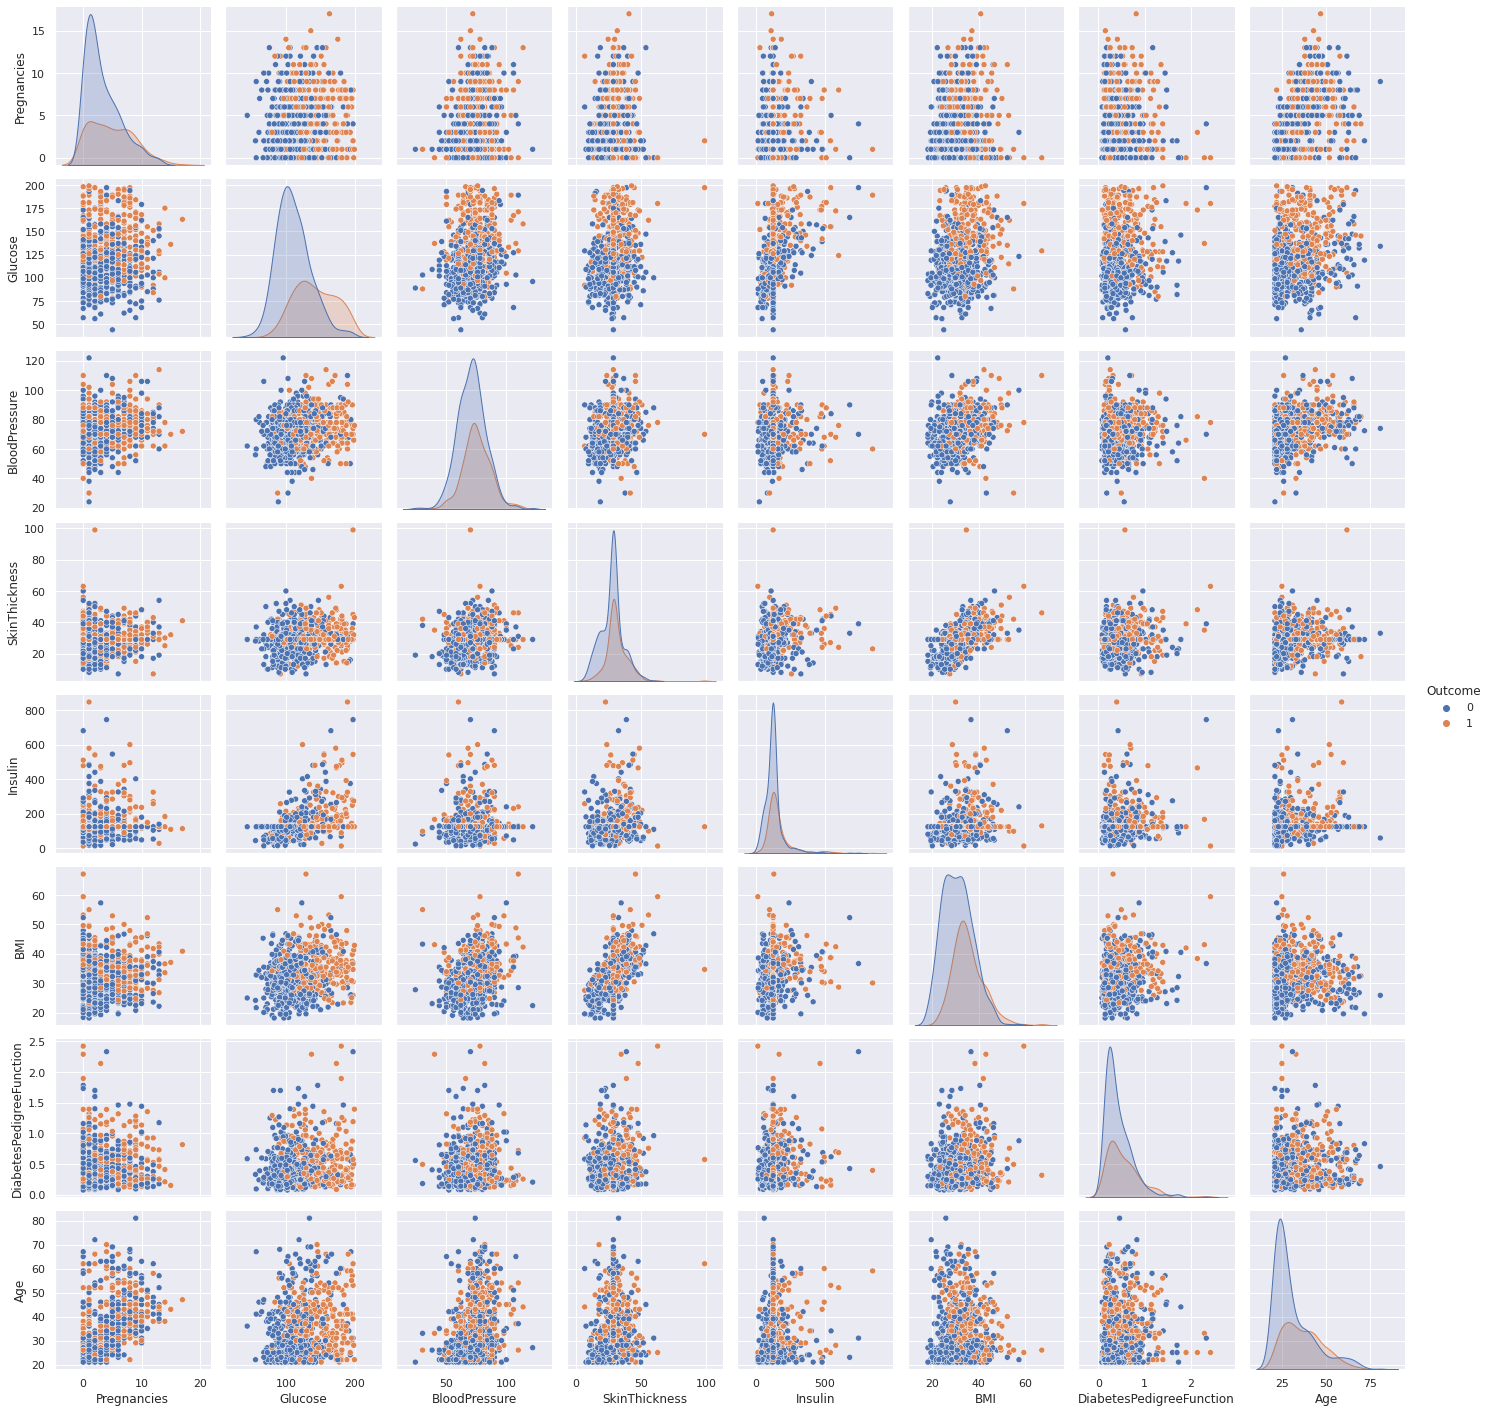

In [28]:
# distribuição dos dados em relação ao atributo alvo
sns.pairplot(df2, hue='Outcome', kind='scatter');

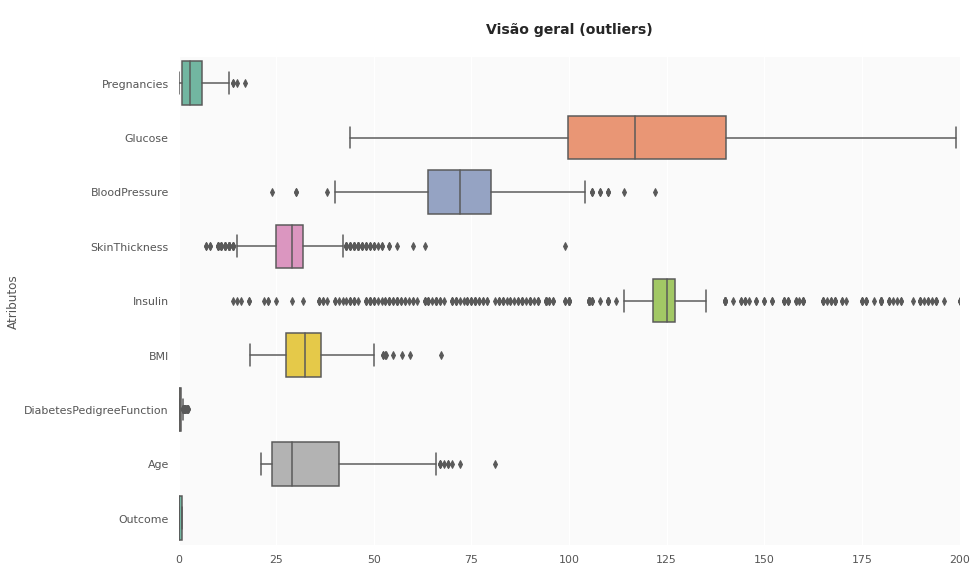

In [25]:
# boxplot - visualizando outliers
plt.style.use('ggplot')  # usando o estilo ggplot2

f, ax = plt.subplots(figsize=(14,9))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))

plt.ylabel('Atributos')
plt.title('\nVisão geral (outliers)\n',
          {'fontsize': 14,'fontweight': 'bold'})

ax = sns.boxplot(data=df2, 
  orient='h', 
  palette='Set2')

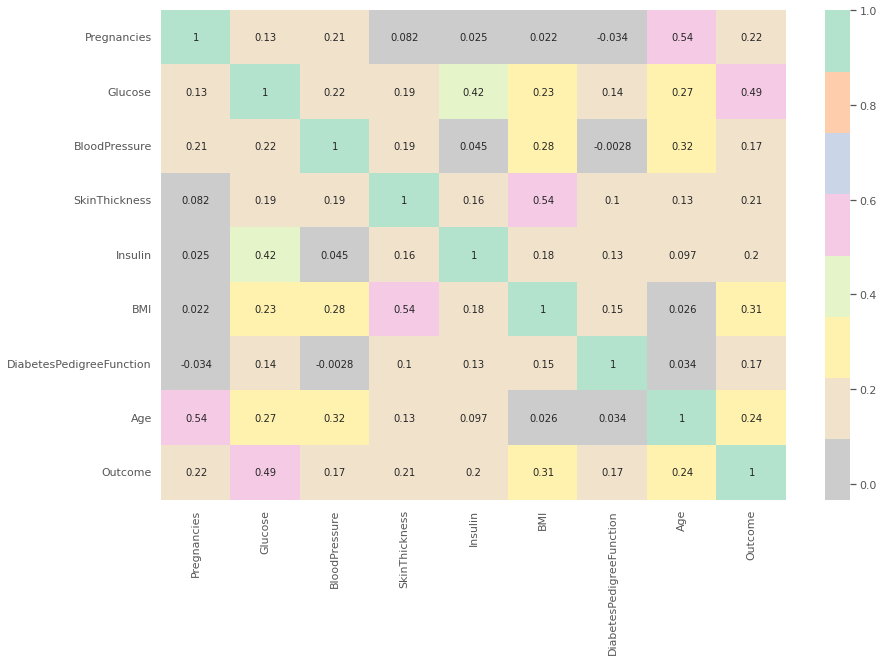

In [32]:
# correlação entre todos os recursos depois da inputação dos valores
plt.figure(figsize=(14,9))
sns.heatmap(df2.corr(), 
            annot=True, cmap='Pastel2_r');

### **4. Preparação dos dados**

In [33]:
# dados para modelagem
data_modeling = df2.sample(frac=0.8, random_state=42)

# dados para teste
data_test = df2.drop(data_modeling.index)

# resetando os índices dos conjuntos de dados - modelagem e teste
data_modeling.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

# visualizando a dimensão dos conjuntos de dados
print('Dados para modelagem:' + str(data_modeling.shape))
print('Dados para teste do modelo:' + str(data_test.shape))

Dados para modelagem:(614, 9)
Dados para teste do modelo:(154, 9)


In [34]:
# índice inicial e final do conjunto de dados "df2"
df2.index.min(), df2.index.max()

(0, 767)

In [35]:
# índice inicial e final do conjunto de dados "data_modeling"
data_modeling.index.min(), data_modeling.index.max()

(0, 613)

In [36]:
# índice inicial e final do conjunto de dados "data_teste"
data_test.index.min(), data_test.index.max()

(0, 153)

In [37]:
# visualizando o nome e a quantidade de atributos
print(
    'Total de colunas:', len(data_modeling.columns),
    ' | ',
    data_modeling.columns
)

Total de colunas: 9  |  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [38]:
# visualizando as 5 primeiras linhas do dados para modelagem
data_modeling[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,125.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,125.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,125.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,125.0,29.9,0.210,50,0


In [39]:
# instanciando as variáveis explicativas e a variável resposta
X, y = data_modeling.values[:, :8], data_modeling.values[:, 8]

In [40]:
# visualizando as 5 primeiras observações das variáveis explicativas
X[:5]

array([[6.00e+00, 9.80e+01, 5.80e+01, 3.30e+01, 1.90e+02, 3.40e+01,
        4.30e-01, 4.30e+01],
       [2.00e+00, 1.12e+02, 7.50e+01, 3.20e+01, 1.25e+02, 3.57e+01,
        1.48e-01, 2.10e+01],
       [2.00e+00, 1.08e+02, 6.40e+01, 2.90e+01, 1.25e+02, 3.08e+01,
        1.58e-01, 2.10e+01],
       [8.00e+00, 1.07e+02, 8.00e+01, 2.90e+01, 1.25e+02, 2.46e+01,
        8.56e-01, 3.40e+01],
       [7.00e+00, 1.36e+02, 9.00e+01, 2.90e+01, 1.25e+02, 2.99e+01,
        2.10e-01, 5.00e+01]])

In [41]:
# visualizando as 5 primeiras observações da variável resposta
y[:5]

array([0., 0., 0., 0., 0.])

In [42]:
# importando a função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split

In [43]:
# realizando o particionamento dos dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42)

In [44]:
# contabilizando a quantidade de observações por variável
len(X_train), len(X_val), len(y_train), len(y_val)

(429, 185, 429, 185)

In [45]:
# visualizando as 10 primeiras observações da variável "X_train"
X_train[:10]

array([[1.000e+00, 1.160e+02, 7.000e+01, 2.800e+01, 1.250e+02, 2.740e+01,
        2.040e-01, 2.100e+01],
       [3.000e+00, 1.060e+02, 5.400e+01, 2.100e+01, 1.580e+02, 3.090e+01,
        2.920e-01, 2.400e+01],
       [1.000e+00, 1.280e+02, 8.800e+01, 3.900e+01, 1.100e+02, 3.650e+01,
        1.057e+00, 3.700e+01],
       [4.000e+00, 1.470e+02, 7.400e+01, 2.500e+01, 2.930e+02, 3.490e+01,
        3.850e-01, 3.000e+01],
       [3.000e+00, 1.290e+02, 6.400e+01, 2.900e+01, 1.150e+02, 2.640e+01,
        2.190e-01, 2.800e+01],
       [1.000e+00, 1.000e+02, 6.600e+01, 2.900e+01, 1.960e+02, 3.200e+01,
        4.440e-01, 4.200e+01],
       [4.000e+00, 1.460e+02, 8.500e+01, 2.700e+01, 1.000e+02, 2.890e+01,
        1.890e-01, 2.700e+01],
       [0.000e+00, 1.390e+02, 6.200e+01, 1.700e+01, 2.100e+02, 2.210e+01,
        2.070e-01, 2.100e+01],
       [0.000e+00, 1.060e+02, 7.000e+01, 3.700e+01, 1.480e+02, 3.940e+01,
        6.050e-01, 2.200e+01],
       [4.000e+00, 1.110e+02, 7.200e+01, 4.700e+01, 2.0

In [46]:
# visualizando as 10 primeiras observações da variável "X_val"
X_val[:10]

array([[1.00e+00, 1.24e+02, 7.40e+01, 3.60e+01, 1.25e+02, 2.78e+01,
        1.00e-01, 3.00e+01],
       [4.00e+00, 1.44e+02, 5.80e+01, 2.80e+01, 1.40e+02, 2.95e+01,
        2.87e-01, 3.70e+01],
       [1.00e+00, 8.00e+01, 5.50e+01, 2.90e+01, 1.25e+02, 1.91e+01,
        2.58e-01, 2.10e+01],
       [1.00e+00, 1.25e+02, 7.00e+01, 2.40e+01, 1.10e+02, 2.43e+01,
        2.21e-01, 2.50e+01],
       [1.00e+00, 1.09e+02, 6.00e+01, 8.00e+00, 1.82e+02, 2.54e+01,
        9.47e-01, 2.10e+01],
       [4.00e+00, 1.25e+02, 8.00e+01, 2.90e+01, 1.25e+02, 3.23e+01,
        5.36e-01, 2.70e+01],
       [8.00e+00, 1.51e+02, 7.80e+01, 3.20e+01, 2.10e+02, 4.29e+01,
        5.16e-01, 3.60e+01],
       [2.00e+00, 1.08e+02, 6.40e+01, 2.90e+01, 1.25e+02, 3.08e+01,
        1.58e-01, 2.10e+01],
       [1.00e+00, 8.80e+01, 3.00e+01, 4.20e+01, 9.90e+01, 5.50e+01,
        4.96e-01, 2.60e+01],
       [3.00e+00, 9.60e+01, 5.60e+01, 3.40e+01, 1.15e+02, 2.47e+01,
        9.44e-01, 3.90e+01]])

### **5. Aplicação e avaliação dos modelos**

**Regressão logística**

In [47]:
# importando a função
from sklearn.linear_model import LogisticRegression

In [48]:
# instanciando o modelo
logRegr_model = LogisticRegression(max_iter=1_500, random_state=42)

In [49]:
# treinando o modelo
logRegr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1500, random_state=42)

In [50]:
# realizando as predições com os dados de treino "X_train"
pred_logRegr_train = logRegr_model.predict(X_train)
pred_logRegr_train[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
# avaliando acurácia do modelo com os dados de treino
score_logRegr = logRegr_model.score(X_train, y_train)
round(score_logRegr, 3)

0.781

In [52]:
# importando função para avaliar acurácia do modelo
from sklearn.metrics import accuracy_score

In [53]:
# realizando as predições com os dados de validação "X_val"
pred_logRegr_val = logRegr_model.predict(X_val)
pred_logRegr_val[:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [54]:
acc_logRegr_model = accuracy_score(y_val, pred_logRegr_val)

# acurácia do modelo nos dados de treino
# print(f'Acurácia (dados de treino): {accuracy_score(y_val, pred_logRegr_val):.3f}')
print(f'Acurácia (dados de treino): {acc_logRegr_model:.3f}')

Acurácia (dados de treino): 0.789


In [55]:
# importando as funções para gerar o relatório e a matriz de confusão do modelo
from sklearn.metrics import classification_report, confusion_matrix

Matriz de confusão: 
[[102  14]
 [ 25  44]]

Relatório: 
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       116
         1.0       0.76      0.64      0.69        69

    accuracy                           0.79       185
   macro avg       0.78      0.76      0.77       185
weighted avg       0.79      0.79      0.78       185



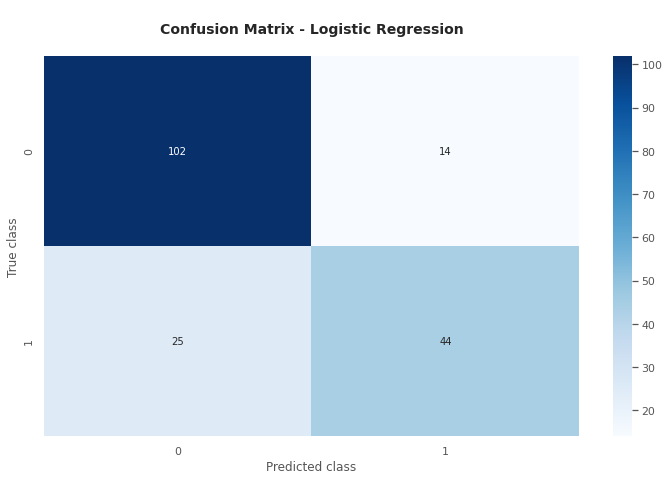

In [56]:
print(
    f'Matriz de confusão: \n{confusion_matrix(y_val, pred_logRegr_val)}',
    f'Relatório: \n{classification_report(y_val, pred_logRegr_val)}',
    sep='\n\n'
    )

# gráfico da matriz de confusão do modelo 
pred_logRegr_val = logRegr_model.predict(X_val)
logRegr_cm = confusion_matrix(y_val, pred_logRegr_val)

plt.figure(figsize=(12,7))
sns.heatmap(logRegr_cm, annot=True, fmt='.0f', 
            # xticklabels=['0', '1'], 
            # yticklabels=['0', '1'],
            cmap='Blues'
            )


plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('\nConfusion Matrix - Logistic Regression\n', 
          {'fontsize': 14,'fontweight': 'bold'});

**Light GBM**

In [57]:
# importando a função
from lightgbm import LGBMClassifier

In [58]:
# instanciando o modelo
LGBM_model = LGBMClassifier(learning_rate=0.008, n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10)

In [59]:
# treinando o modelo
LGBM_model.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.008, max_depth=10, n_estimators=1500,
               random_state=42)

In [60]:
# realizando as predições com os dados de treino "X_train"
pred_LGBM_train = LGBM_model.predict(X_train)
pred_LGBM_train[:10]

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 1.])

In [61]:
# avaliando acurácia do modelo com os dados de treino
score_LGBM = LGBM_model.score(X_train, y_train)
round(score_LGBM, 3)

1.0

In [62]:
# realizando as predições com os dados de validação "X_val"
pred_LGBM_val = LGBM_model.predict(X_val)
pred_LGBM_val[:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [63]:
acc_LGBM_model = accuracy_score(y_val, pred_LGBM_val)

# acurácia do modelo nos dados de treino
# print(f'Acurácia (dados de treino): {accuracy_score(y_val, pred_LGBM_val):.3f}')
print(f'Acurácia (dados de treino): {acc_LGBM_model:.3f}')

Acurácia (dados de treino): 0.714


Matriz de confusão: 
[[88 28]
 [25 44]]

Relatório: 
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       116
         1.0       0.61      0.64      0.62        69

    accuracy                           0.71       185
   macro avg       0.69      0.70      0.70       185
weighted avg       0.72      0.71      0.71       185



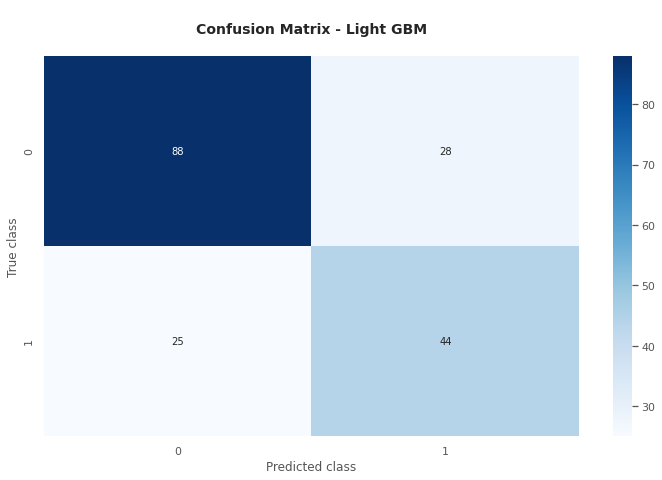

In [64]:
print(
    f'Matriz de confusão: \n{confusion_matrix(y_val, pred_LGBM_val)}',
    f'Relatório: \n{classification_report(y_val, pred_LGBM_val)}',
    sep='\n\n'
    )

# gráfico da matriz de confusão do modelo 
pred_LGBM_val = LGBM_model.predict(X_val)
LGBM_cm = confusion_matrix(y_val, pred_LGBM_val)

plt.figure(figsize=(12,7))
sns.heatmap(LGBM_cm, annot=True, fmt='.0f', 
            # xticklabels=['0', '1'], 
            # yticklabels=['0', '1'],
            cmap='Blues'
            )


plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('\nConfusion Matrix - Light GBM\n', 
          {'fontsize': 14,'fontweight': 'bold'});

**XG Boost**

In [65]:
# importando a função
from xgboost import XGBClassifier

In [66]:
# instanciando o modelo
XGB_model = XGBClassifier(learning_rate=0.001, n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10)

In [67]:
# treinando o modelo
XGB_model.fit(X_train, y_train)

XGBClassifier(learning_rate=0.001, max_depth=10, n_estimators=1500, n_jobs=-1,
              random_state=42)

In [68]:
# realizando as predições com os dados de treino "X_train"
pred_XGB_train = XGB_model.predict(X_train)
pred_XGB_train[:10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [69]:
# avaliando acurácia do modelo com os dados de treino
score_XGB = XGB_model.score(X_train, y_train)
round(score_XGB, 3)

0.953

In [70]:
# realizando as predições com os dados de validação "X_val"
pred_XGB_val = XGB_model.predict(X_val)
pred_XGB_val[:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [71]:
acc_XGB_model = accuracy_score(y_val, pred_XGB_val)

# acurácia do modelo nos dados de validação
# print(f'Acurácia (dados de treino): {accuracy_score(y_val, pred_XGB_val):.3f}')
print(f'Acurácia (dados de treino): {acc_XGB_model :.3f}')

Acurácia (dados de treino): 0.746


Matriz de confusão: 
[[91 25]
 [22 47]]

Relatório: 
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       116
         1.0       0.65      0.68      0.67        69

    accuracy                           0.75       185
   macro avg       0.73      0.73      0.73       185
weighted avg       0.75      0.75      0.75       185



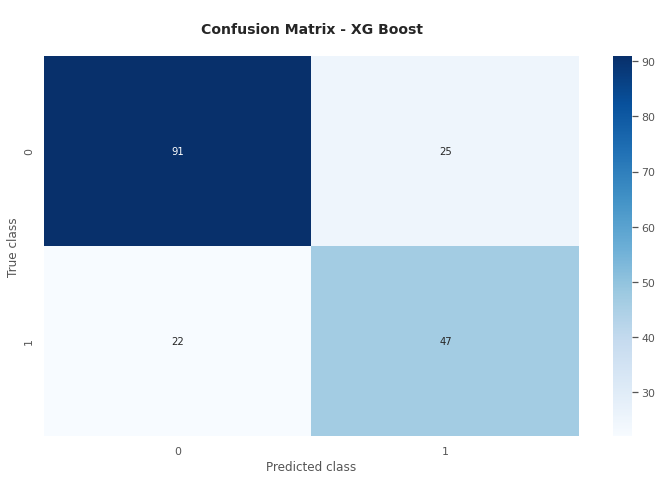

In [72]:
print(
    f'Matriz de confusão: \n{confusion_matrix(y_val, pred_XGB_val)}',
    f'Relatório: \n{classification_report(y_val, pred_XGB_val)}',
    sep='\n\n'
    )

# gráfico da matriz de confusão do modelo 
pred_XGB_val = XGB_model.predict(X_val)
XGB_cm = confusion_matrix(y_val, pred_XGB_val)

plt.figure(figsize=(12,7))
sns.heatmap(XGB_cm, annot=True, fmt='.0f', 
            # xticklabels=['0', '1'], 
            # yticklabels=['0', '1'],
            cmap='Blues'
            )


plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('\nConfusion Matrix - XG Boost\n', 
          {'fontsize': 14,'fontweight': 'bold'});

**Árvore de decisão**

In [73]:
# importando a função
from sklearn.tree import DecisionTreeClassifier

In [74]:
# instanciando o modelo
dtc_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=3)

In [75]:
# treinando o modelo
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, random_state=42)

In [76]:
# realizando as predições com os dados de treino "X_train"
pred_dtc_train = dtc_model.predict(X_train)
pred_dtc_train[:10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [77]:
# avaliando acurácia do modelo com os dados de treino
score_dtc = dtc_model.score(X_train, y_train)
round(score_dtc, 3)

0.93

In [78]:
# realizando as predições com os dados de validação "X_val"
pred_dtc_val = dtc_model.predict(X_val)
pred_dtc_val[:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])

In [79]:
acc_dtc_model = accuracy_score(y_val, pred_dtc_val)

# acurácia do modelo nos dados de validação
# print(f'Acurácia (dados de treino): {accuracy_score(y_val, pred_dtc_val):.3f}')
print(f'Acurácia (dados de treino): {acc_dtc_model:.3f}')

Acurácia (dados de treino): 0.714


Matriz de confusão: 
[[97 19]
 [34 35]]

Relatório: 
              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79       116
         1.0       0.65      0.51      0.57        69

    accuracy                           0.71       185
   macro avg       0.69      0.67      0.68       185
weighted avg       0.71      0.71      0.70       185



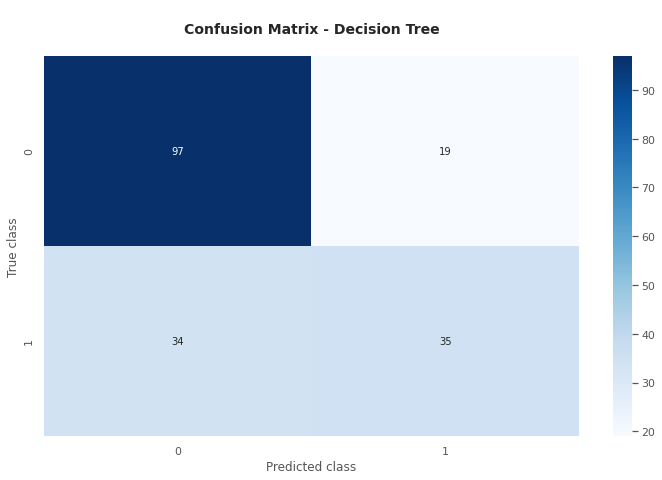

In [80]:
print(
    f'Matriz de confusão: \n{confusion_matrix(y_val, pred_dtc_val)}',
    f'Relatório: \n{classification_report(y_val, pred_dtc_val)}',
    sep='\n\n'
    )

# gráfico da matriz de confusão do modelo 
pred_dtc_val = dtc_model.predict(X_val)
dtc_cm = confusion_matrix(y_val, pred_dtc_val)

plt.figure(figsize=(12,7))
sns.heatmap(dtc_cm, annot=True, fmt='.0f', 
            # xticklabels=['0', '1'], 
            # yticklabels=['0', '1'],
            cmap='Blues'
            )


plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('\nConfusion Matrix - Decision Tree\n', 
          {'fontsize': 14,'fontweight': 'bold'});

**Floresta aleatória**

In [81]:
# importando a função
from sklearn.ensemble import RandomForestClassifier

In [82]:
# instanciando o modelo
rfc_model = RandomForestClassifier(n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10, min_samples_leaf=3)

In [83]:
# treinando o modelo
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=1500,
                       n_jobs=-1, random_state=42)

In [84]:
# realizando as predições com os dados de treino "X_train"
pred_rfc_train = rfc_model.predict(X_train)
pred_rfc_train[:10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [85]:
# avaliando acurácia do modelo com os dados de treino
score_rfc = rfc_model.score(X_train, y_train)
round(score_rfc, 3)

0.944

In [86]:
# realizando as predições com os dados de validação "X_val"
pred_rfc_val = rfc_model.predict(X_val)
pred_rfc_val[:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [87]:
acc_rfc_model = accuracy_score(y_val, pred_rfc_val)

# acurácia do modelo nos dados de validação
# print(f'Acurácia (dados de treino): {accuracy_score(y_val, pred_rfc_val):.3f}')
print(f'Acurácia (dados de treino): {acc_rfc_model:.3f}')

Acurácia (dados de treino): 0.773


Matriz de confusão: 
[[99 17]
 [25 44]]

Relatório: 
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       116
         1.0       0.72      0.64      0.68        69

    accuracy                           0.77       185
   macro avg       0.76      0.75      0.75       185
weighted avg       0.77      0.77      0.77       185



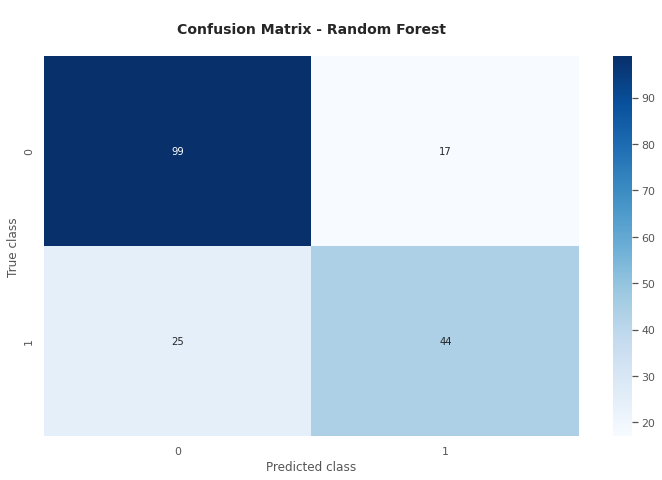

In [88]:
print(
    f'Matriz de confusão: \n{confusion_matrix(y_val, pred_rfc_val)}',
    f'Relatório: \n{classification_report(y_val, pred_rfc_val)}',
    sep='\n\n'
    )

# gráfico da matriz de confusão do modelo 
pred_rfc_val = rfc_model.predict(X_val)
rfc_cm = confusion_matrix(y_val, pred_rfc_val)

plt.figure(figsize=(12,7))
sns.heatmap(rfc_cm, annot=True, fmt='.0f', 
            # xticklabels=['0', '1'], 
            # yticklabels=['0', '1'],
            cmap='Blues'
            )


plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('\nConfusion Matrix - Random Forest\n', 
          {'fontsize': 14,'fontweight': 'bold'});

In [89]:
# acurácia dos modelos
print(
    '\tACURÁCIA\n'
    f'Logistic Regression: {acc_logRegr_model:.4f}',
    f'Light GBM: {acc_LGBM_model:.4f}',
    f'XGBoost: {acc_XGB_model:.4f}',
    f'Decision Tree: {acc_dtc_model:.4f}',
    f'Randon Forest: {acc_rfc_model:.4f}',
    sep='\n'
)

	ACURÁCIA
Logistic Regression: 0.7892
Light GBM: 0.7135
XGBoost: 0.7459
Decision Tree: 0.7135
Randon Forest: 0.7730


### **6. Escolha e aplicação do modelo nos dados de teste**

**Pickle**

In [90]:
# biblioteca para salvar serializado o modelo
import pickle as pk

In [91]:
# salvando o modelo "logRegr_model"
saved_model = pk.dumps(logRegr_model) 

In [92]:
# carregando o modelo salvo 
logRegr_from_pickle = pk.loads(saved_model)

# após carregar modelo, usaremos para fazer as previsões
logRegr_from_pickle.predict(X_val)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.])

In [93]:
# visuzilando o conjunto de dados de teste
data_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
3,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
4,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
...,...,...,...,...,...,...,...,...,...
149,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0
150,4,136.0,70.0,29.0,125.0,31.2,1.182,22,1
151,7,137.0,90.0,41.0,125.0,32.0,0.391,39,0
152,9,170.0,74.0,31.0,125.0,44.0,0.403,43,1


In [94]:
# sorteando um dado aleatório do "data_test"
test = data_test.sample(1)
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
94,4,114.0,64.0,29.0,125.0,28.9,0.126,24,0


In [95]:
# excluindo o dado da variável "Outcome" e transformando os dados em um vetor (array)
test = test.drop('Outcome', axis=1).values
test

array([[  4.   , 114.   ,  64.   ,  29.   , 125.   ,  28.9  ,   0.126,
         24.   ]])

In [96]:
# realizando a predição com o modelo
logRegr_model.predict(test)

array([0.])

**Joblib**

In [97]:
# biblioteca para salvar serializado o modelo
import joblib as jl

In [98]:
# instanciando o modelo no objeto "logRegr_model1.pkl"
jl.dump(logRegr_model, 'logRegr_model1.pkl')

['logRegr_model1.pkl']

In [99]:
# visualizando o diretório principal
!ls

diabetes.csv  logRegr_model1.pkl  model_logReg2.pkl  sample_data


In [100]:
# instanciando o modelo no objeto "classifier_model"
classifier_model = jl.load('logRegr_model1.pkl')
classifier_model   # visualizando o modelo

LogisticRegression(max_iter=1500, random_state=42)

In [101]:
# realizando a predição com o modelo
classifier_model.predict(test)

array([0.])

![](https://c.tenor.com/regGdFhFUpwAAAAM/luke-lukeskywalker.gif) 

## **Explorando outras técnicas**

---



In [102]:
# funções para avaliação dos modelos
from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             plot_confusion_matrix, 
                             roc_curve)

# funções para realizar a validação cruzada, curva de aprendizado e particionanmento dos dados
from sklearn.model_selection import (cross_val_score, 
                                    learning_curve,
                                    train_test_split)

# funções dos modelos
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [103]:
# instanciando os classificadores que será utilizados
clfs = {
    'Logistic Regression': LogisticRegression(max_iter=1_500, random_state=42),
    'Light GBM': LGBMClassifier(learning_rate=0.008, n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10),
    'XG Boost': XGBClassifier(learning_rate=0.001, n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10),
    'KNN': KNeighborsClassifier(n_neighbors=2),
    'SVM Linear': SVC(kernel='linear', C=0.025, random_state=42),
    'SVM com Kernel RBF': SVC(gamma=2, C=1, probability=True, random_state=42),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=3),
    'Random Forest': RandomForestClassifier(n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10, min_samples_leaf=3),
    'Rede Neural': MLPClassifier(alpha=1, max_iter=1_500, random_state=42),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis()
}

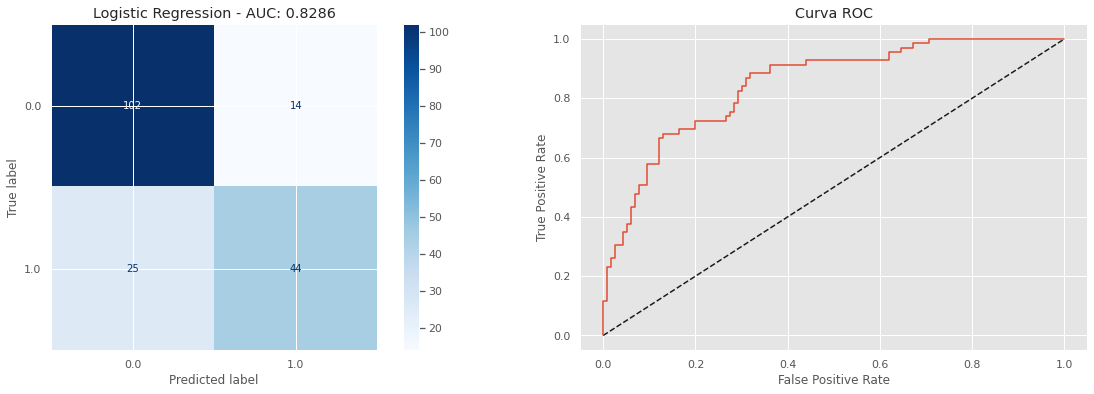

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       116
         1.0       0.76      0.64      0.69        69

    accuracy                           0.79       185
   macro avg       0.78      0.76      0.77       185
weighted avg       0.79      0.79      0.78       185

----------------------------------------------------------------------------------------------------------------------------------



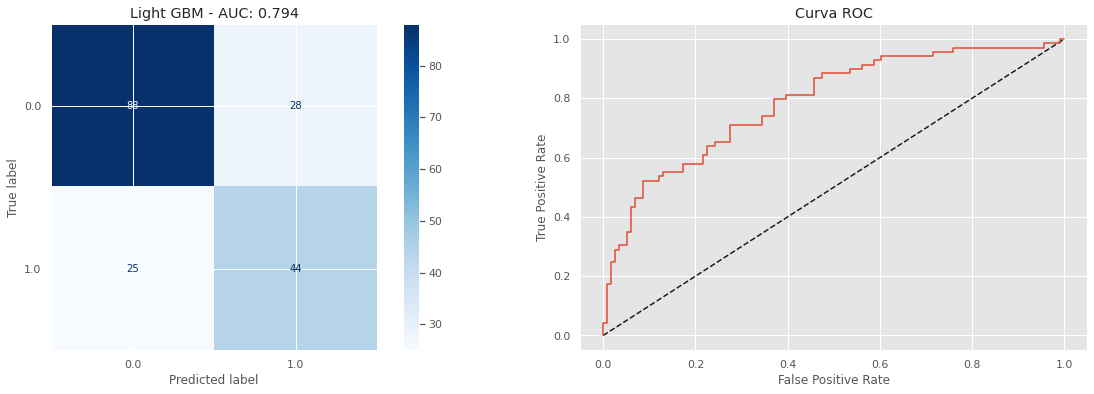

              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       116
         1.0       0.61      0.64      0.62        69

    accuracy                           0.71       185
   macro avg       0.69      0.70      0.70       185
weighted avg       0.72      0.71      0.71       185

----------------------------------------------------------------------------------------------------------------------------------



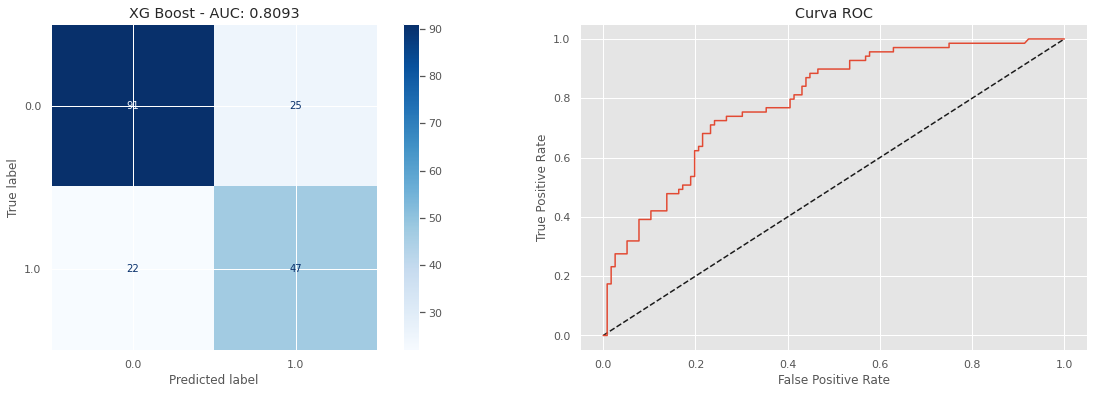

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       116
         1.0       0.65      0.68      0.67        69

    accuracy                           0.75       185
   macro avg       0.73      0.73      0.73       185
weighted avg       0.75      0.75      0.75       185

----------------------------------------------------------------------------------------------------------------------------------



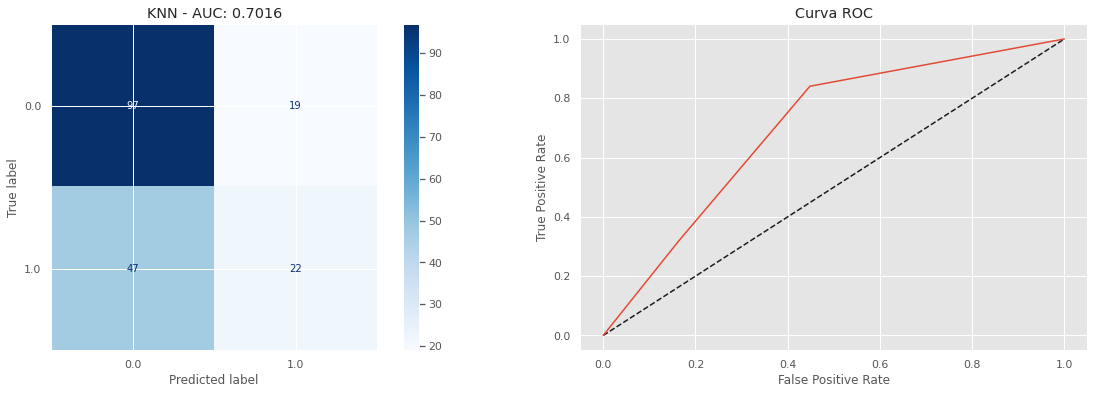

              precision    recall  f1-score   support

         0.0       0.67      0.84      0.75       116
         1.0       0.54      0.32      0.40        69

    accuracy                           0.64       185
   macro avg       0.61      0.58      0.57       185
weighted avg       0.62      0.64      0.62       185

----------------------------------------------------------------------------------------------------------------------------------



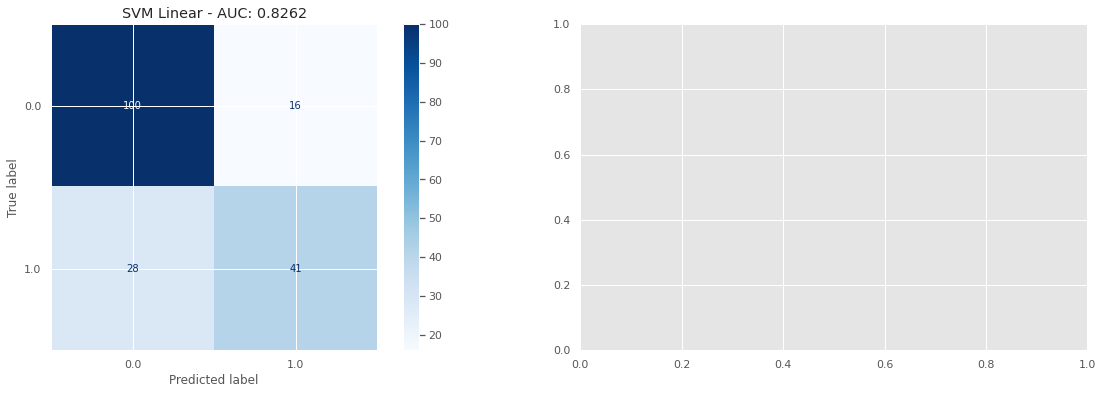

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       116
         1.0       0.72      0.59      0.65        69

    accuracy                           0.76       185
   macro avg       0.75      0.73      0.74       185
weighted avg       0.76      0.76      0.76       185

----------------------------------------------------------------------------------------------------------------------------------



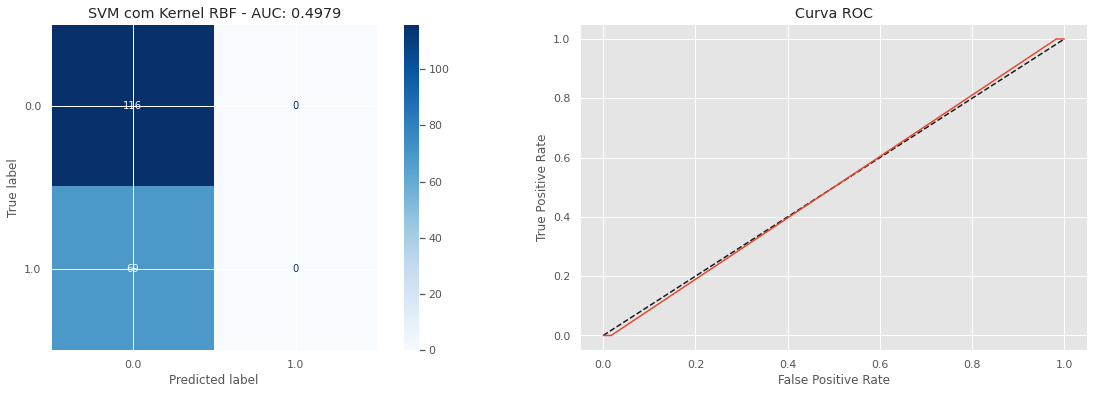

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       116
         1.0       0.00      0.00      0.00        69

    accuracy                           0.63       185
   macro avg       0.31      0.50      0.39       185
weighted avg       0.39      0.63      0.48       185

----------------------------------------------------------------------------------------------------------------------------------



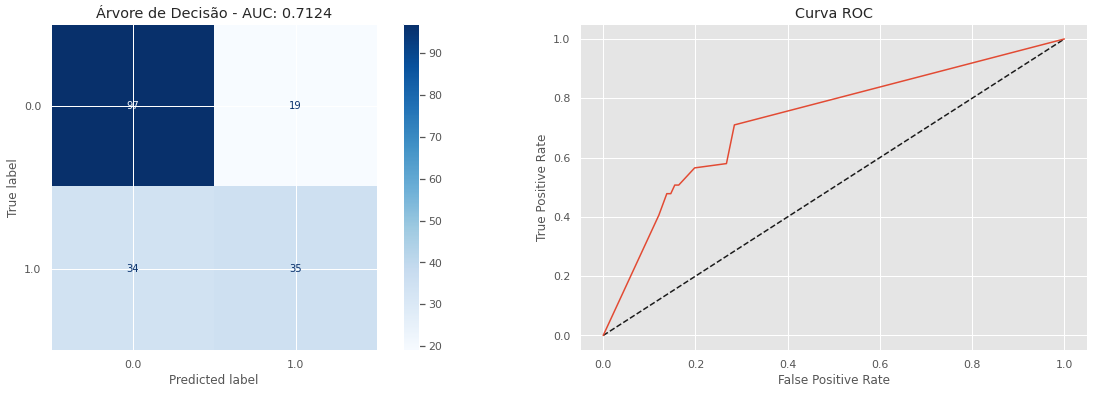

              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79       116
         1.0       0.65      0.51      0.57        69

    accuracy                           0.71       185
   macro avg       0.69      0.67      0.68       185
weighted avg       0.71      0.71      0.70       185

----------------------------------------------------------------------------------------------------------------------------------



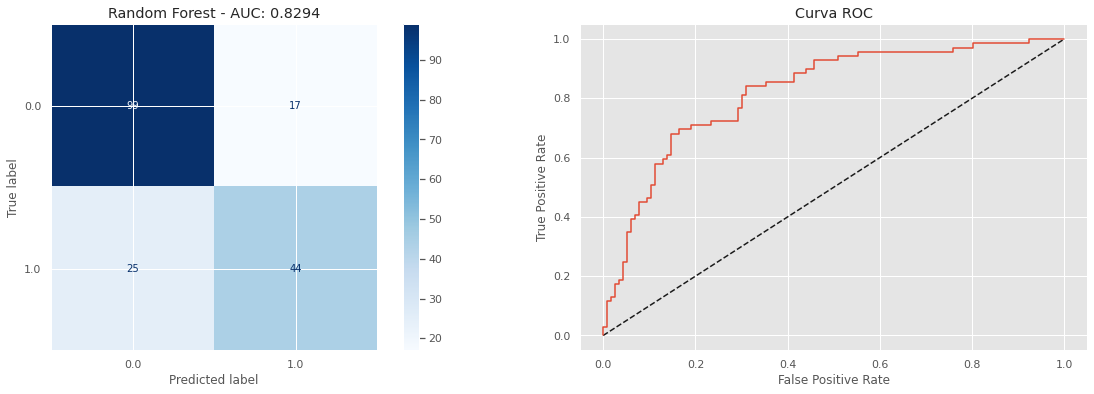

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       116
         1.0       0.72      0.64      0.68        69

    accuracy                           0.77       185
   macro avg       0.76      0.75      0.75       185
weighted avg       0.77      0.77      0.77       185

----------------------------------------------------------------------------------------------------------------------------------



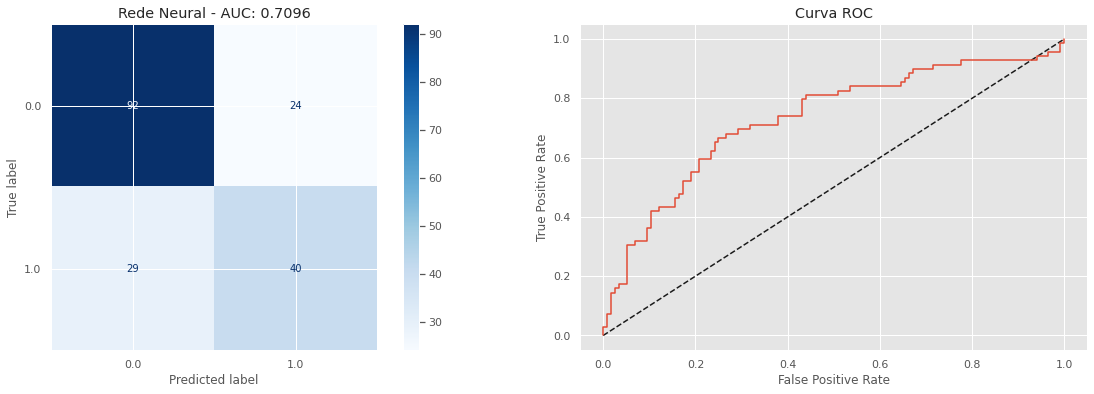

              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78       116
         1.0       0.62      0.58      0.60        69

    accuracy                           0.71       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.71      0.71      0.71       185

----------------------------------------------------------------------------------------------------------------------------------



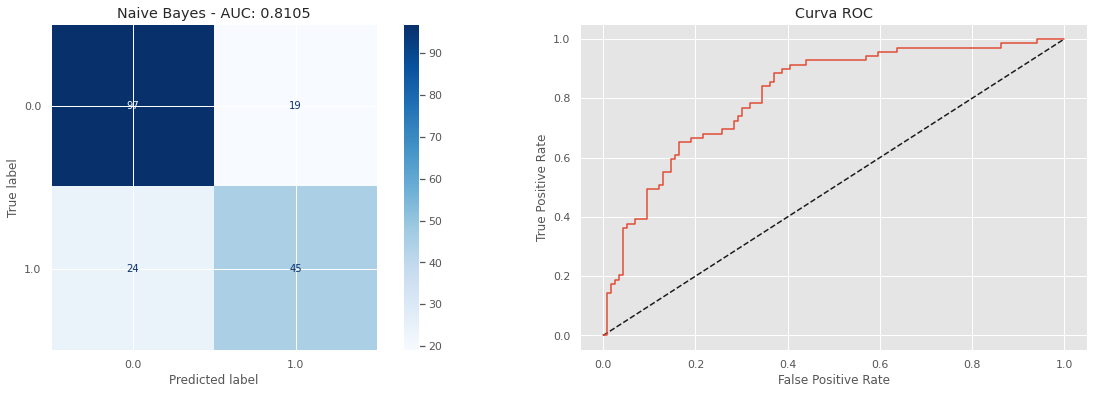

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       116
         1.0       0.70      0.65      0.68        69

    accuracy                           0.77       185
   macro avg       0.75      0.74      0.75       185
weighted avg       0.76      0.77      0.77       185

----------------------------------------------------------------------------------------------------------------------------------



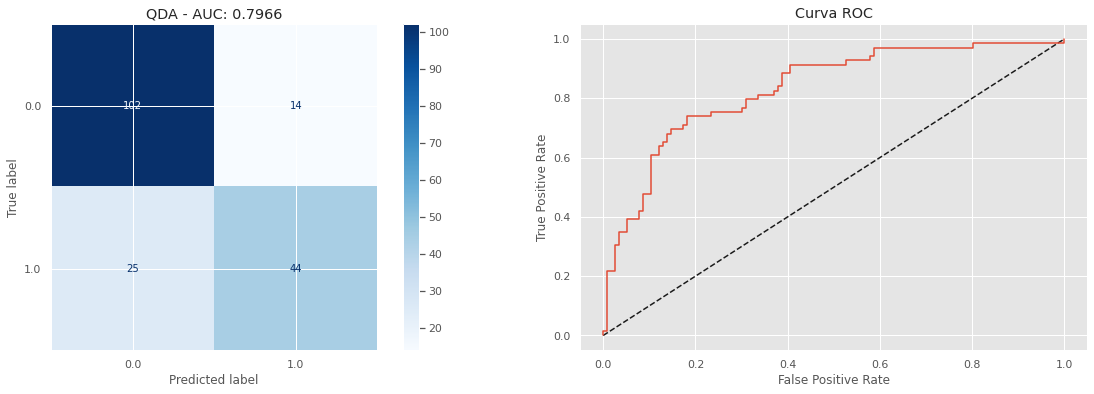

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       116
         1.0       0.76      0.64      0.69        69

    accuracy                           0.79       185
   macro avg       0.78      0.76      0.77       185
weighted avg       0.79      0.79      0.78       185

----------------------------------------------------------------------------------------------------------------------------------



In [104]:
# treinando os classificadores
for name, clf in clfs.items():

  # treina o modelo
  clf.fit(X_train, y_train)

  # calcula a métrica AUC
  cv_auc = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
  
  auc = np.mean(cv_auc).round(4)
  
  # realiza previsões com o modelo
  y_pred = clf.predict(X_val)

  # plota matriz de confusão
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
  
  plot_confusion_matrix(clf, X_val, y_val, ax=ax1, cmap='Blues')
  ax1.set_title(f'{name} - AUC: {auc}')

  # plota a curva quando algoritmo cálcula as probabilidades
  if hasattr(clf, 'predict_proba'):

    # previsões de probabilidades para cada classe
    y_pred_prob = clf.predict_proba(X_val)[:, 1]

    # gera dados para curva ROC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    
    # plota curva ROC
    ax2.plot([0, 1], [0, 1], 'k--')
    ax2.plot(fpr, tpr)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'Curva ROC')

  # apresenta o plot
  plt.show()

  # imprime todas as métricas do modelo
  print(classification_report(y_val, y_pred), end='\n')
  print('-'*130, end='\n\n')

Vou realizar um `balanceamento` dos dados da variável alvo.

In [105]:
# importando a biblioteca
import imblearn

In [106]:
# importando a função
from imblearn.over_sampling import SMOTE 

In [107]:
# seed para reproduzir o mesmo resultado
seed = 42

In [108]:
# instanciando as variáveis explicativas e a variável resposta
X, y = data_modeling.values[:, :8], data_modeling.values[:, 8]

In [109]:
# instanciando o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

In [110]:
# aplicando o balanceamento
X_res, y_res = smote_bal.fit_resample(X, y)
# X_res, y_res = sm.fit_resample(X, y)

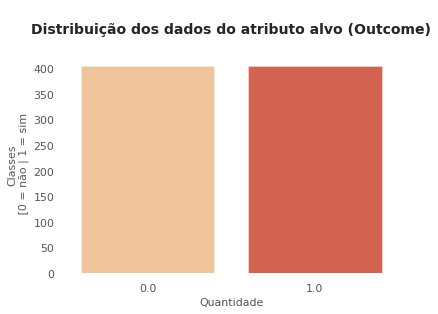

In [111]:
# # gráfico da distribuição das observações do atributo alvo
# plt.figure(figsize=(14,9))

# plt.title('\nDistribuição dos dados do atributo alvo (Outcome)\n', 
#           {'fontsize': 14, 'fontweight': 'bold'})
# sns.countplot(data=y_res)
# plt.ylabel('Classes\n [0 = não | 1 = sim]')
# plt.xlabel('Quantidade');

# plotando gráfico
sns.countplot(y_res, palette = 'OrRd')
plt.box(False)

plt.xlabel('Quantidade', fontsize = 11)
plt.ylabel('Classes\n [0 = não | 1 = sim', fontsize = 11)

plt.title('\nDistribuição dos dados do atributo alvo (Outcome)\n', 
          {'fontsize': 14, 'fontweight': 'bold'})
plt.show();

In [114]:
# contabilizando a quantidade observações nas variáveis após seu balanceamento
len(X_res), len(y_res)

(808, 808)

In [115]:
# realizando o particionamento dos dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, train_size=0.7, random_state=42)

In [116]:
# instanciando os classificadores utilizados
clfs = {
    'Logistic Regression': LogisticRegression(max_iter=1_500, random_state=42),
    'Light GBM': LGBMClassifier(learning_rate=0.008, n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10),
    'XG Boost': XGBClassifier(learning_rate=0.001, n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10),
    'KNN': KNeighborsClassifier(n_neighbors=2),
    'SVM Linear': SVC(kernel='linear', C=0.025, random_state=42),
    'SVM com Kernel RBF': SVC(gamma=2, C=1, probability=True, random_state=42),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=3),
    'Random Forest': RandomForestClassifier(n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10, min_samples_leaf=3),
    'Rede Neural': MLPClassifier(alpha=1, max_iter=1_500, random_state=42),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis()
}

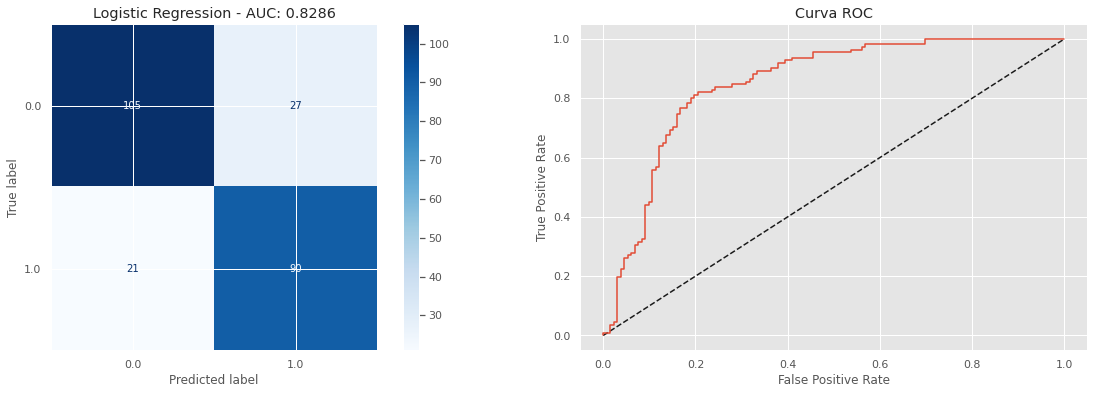

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81       132
         1.0       0.77      0.81      0.79       111

    accuracy                           0.80       243
   macro avg       0.80      0.80      0.80       243
weighted avg       0.80      0.80      0.80       243

----------------------------------------------------------------------------------------------------------------------------------



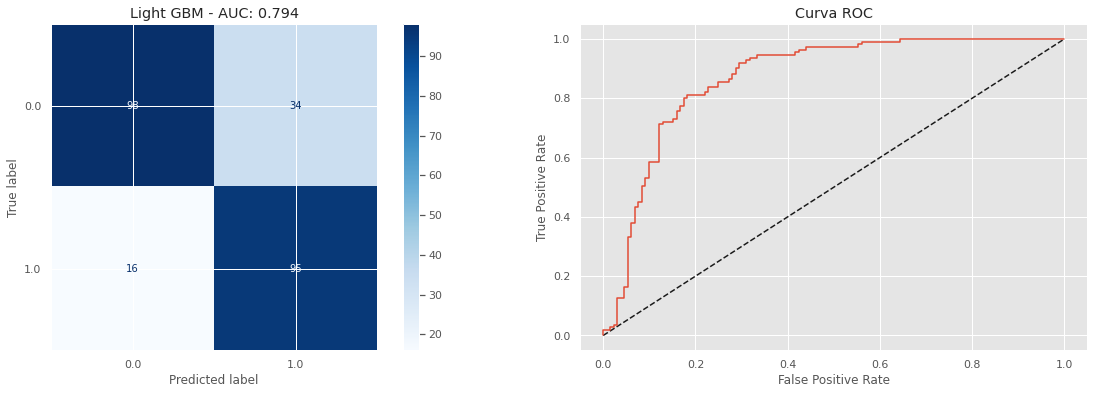

              precision    recall  f1-score   support

         0.0       0.86      0.74      0.80       132
         1.0       0.74      0.86      0.79       111

    accuracy                           0.79       243
   macro avg       0.80      0.80      0.79       243
weighted avg       0.80      0.79      0.79       243

----------------------------------------------------------------------------------------------------------------------------------



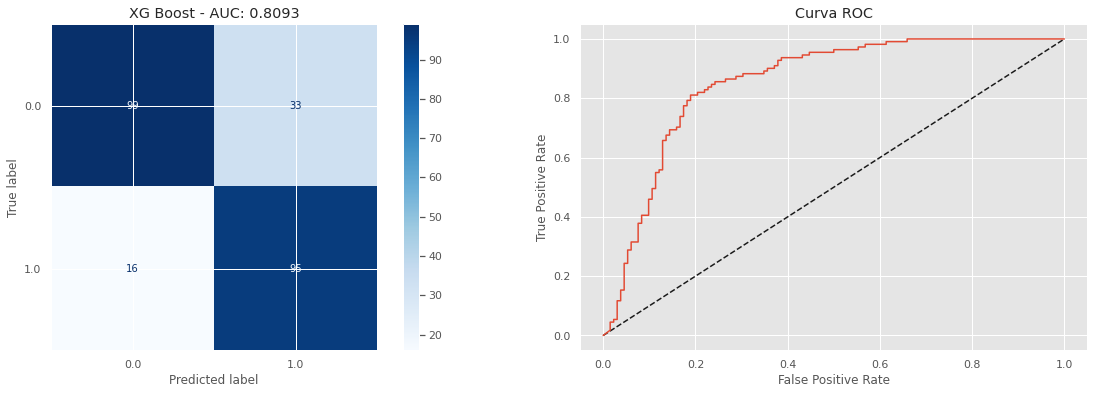

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       132
         1.0       0.74      0.86      0.79       111

    accuracy                           0.80       243
   macro avg       0.80      0.80      0.80       243
weighted avg       0.81      0.80      0.80       243

----------------------------------------------------------------------------------------------------------------------------------



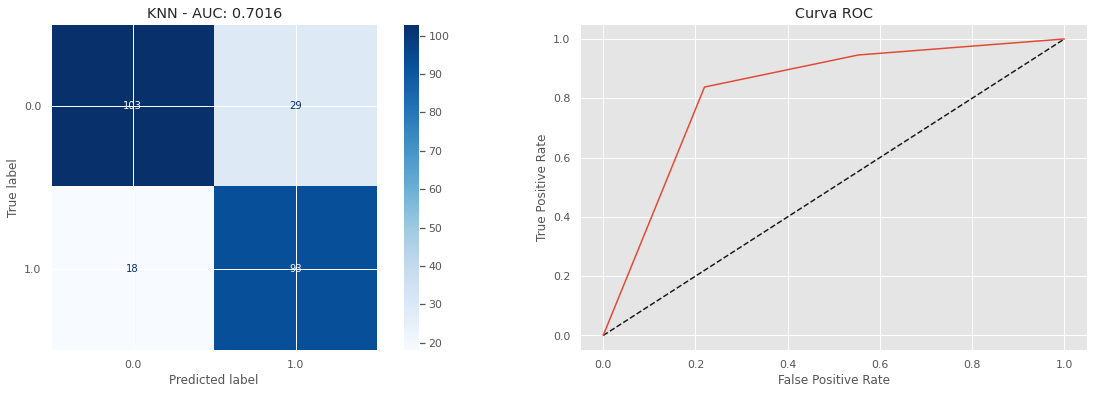

              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81       132
         1.0       0.76      0.84      0.80       111

    accuracy                           0.81       243
   macro avg       0.81      0.81      0.81       243
weighted avg       0.81      0.81      0.81       243

----------------------------------------------------------------------------------------------------------------------------------



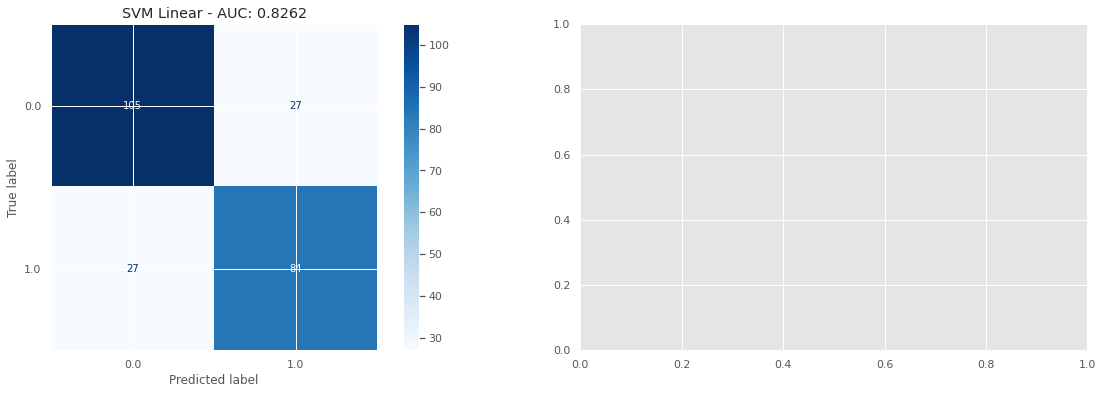

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       132
         1.0       0.76      0.76      0.76       111

    accuracy                           0.78       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.78      0.78      0.78       243

----------------------------------------------------------------------------------------------------------------------------------



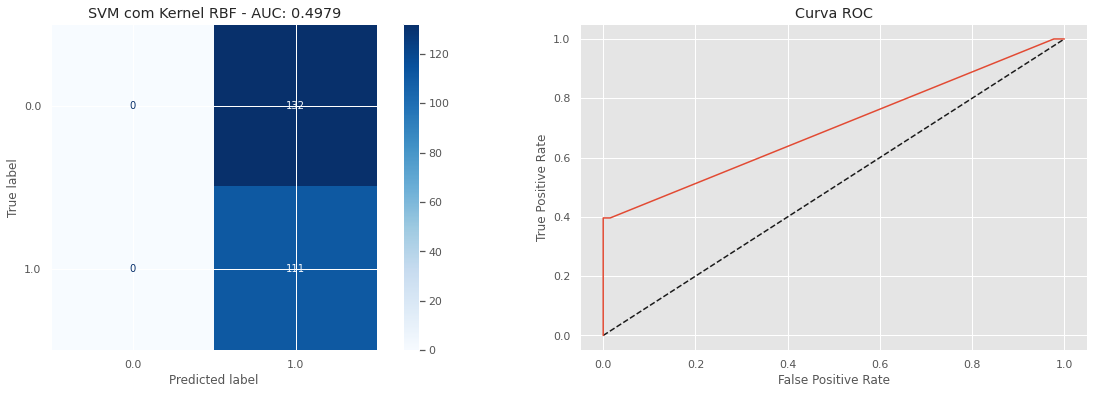

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       132
         1.0       0.46      1.00      0.63       111

    accuracy                           0.46       243
   macro avg       0.23      0.50      0.31       243
weighted avg       0.21      0.46      0.29       243

----------------------------------------------------------------------------------------------------------------------------------



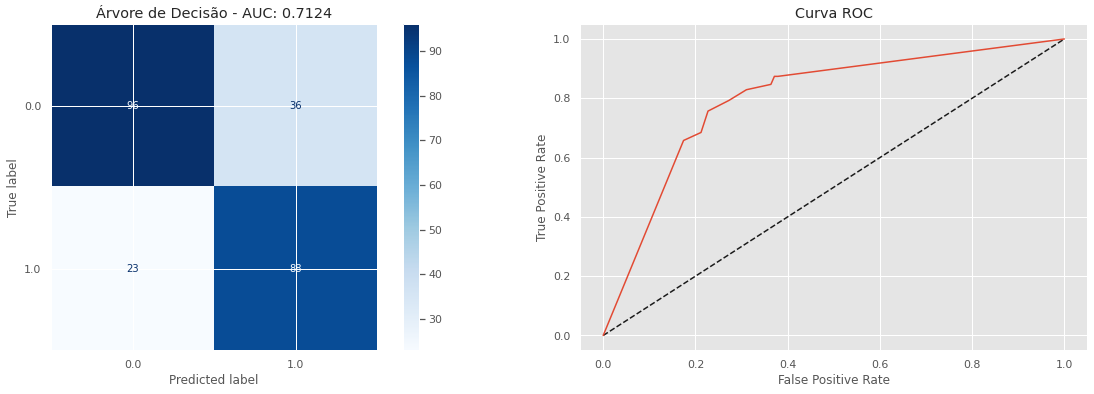

              precision    recall  f1-score   support

         0.0       0.81      0.73      0.76       132
         1.0       0.71      0.79      0.75       111

    accuracy                           0.76       243
   macro avg       0.76      0.76      0.76       243
weighted avg       0.76      0.76      0.76       243

----------------------------------------------------------------------------------------------------------------------------------



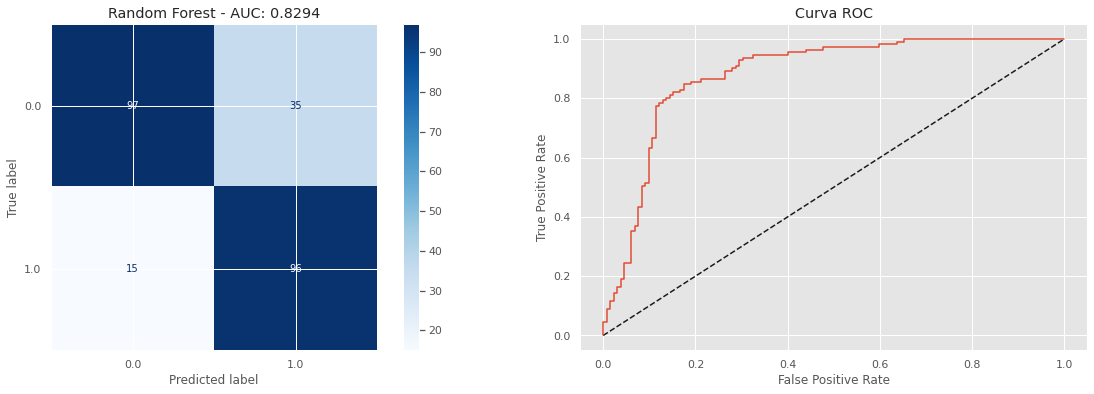

              precision    recall  f1-score   support

         0.0       0.87      0.73      0.80       132
         1.0       0.73      0.86      0.79       111

    accuracy                           0.79       243
   macro avg       0.80      0.80      0.79       243
weighted avg       0.81      0.79      0.79       243

----------------------------------------------------------------------------------------------------------------------------------



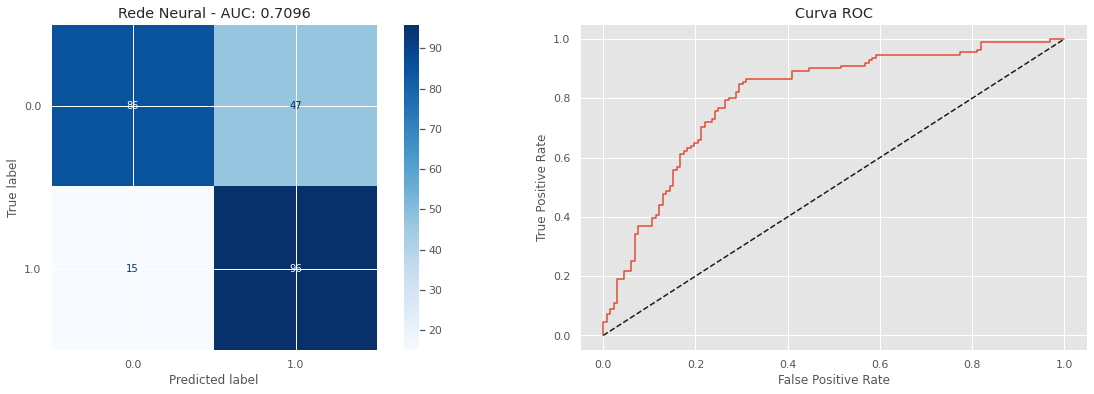

              precision    recall  f1-score   support

         0.0       0.85      0.64      0.73       132
         1.0       0.67      0.86      0.76       111

    accuracy                           0.74       243
   macro avg       0.76      0.75      0.74       243
weighted avg       0.77      0.74      0.74       243

----------------------------------------------------------------------------------------------------------------------------------



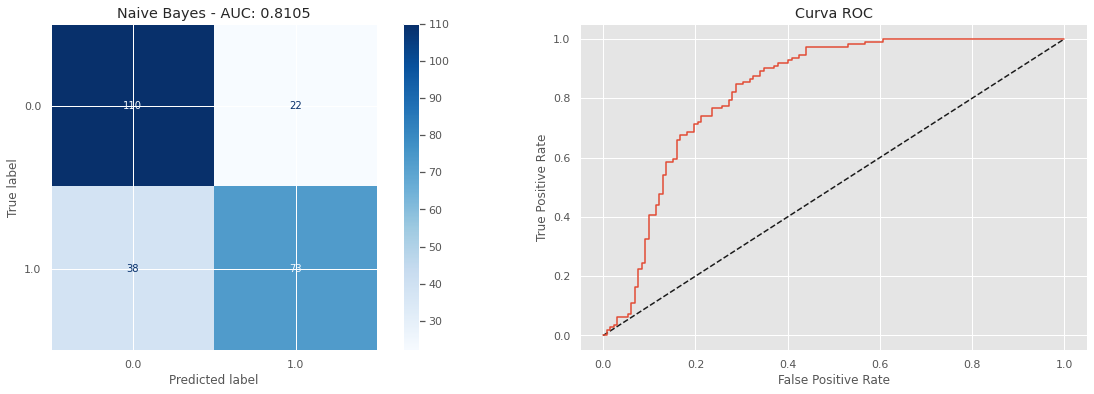

              precision    recall  f1-score   support

         0.0       0.74      0.83      0.79       132
         1.0       0.77      0.66      0.71       111

    accuracy                           0.75       243
   macro avg       0.76      0.75      0.75       243
weighted avg       0.75      0.75      0.75       243

----------------------------------------------------------------------------------------------------------------------------------



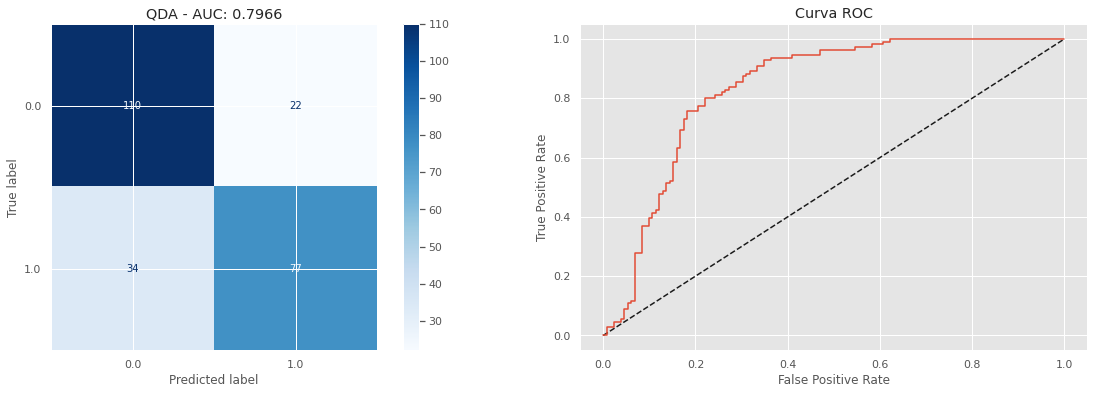

              precision    recall  f1-score   support

         0.0       0.76      0.83      0.80       132
         1.0       0.78      0.69      0.73       111

    accuracy                           0.77       243
   macro avg       0.77      0.76      0.77       243
weighted avg       0.77      0.77      0.77       243

----------------------------------------------------------------------------------------------------------------------------------



In [117]:
# treinando novamente os classificadores
for name, clf in clfs.items():

  # treina o modelo
  clf.fit(X_train, y_train)

  # calcula a métrica AUC
  cv_auc = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
  auc = np.mean(cv_auc).round(4)
  
  # realiza previsões com o modelo
  y_pred = clf.predict(X_val)

  # plota matriz de confusão
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
  
  plot_confusion_matrix(clf, X_val, y_val, ax=ax1, cmap='Blues')
  ax1.set_title(f'{name} - AUC: {auc}')

  # plota a curva quando algoritmo cálcula as probabilidades
  if hasattr(clf, 'predict_proba'):

    # previsões de probabilidades para cada classe
    y_pred_prob = clf.predict_proba(X_val)[:, 1]

    # gera dados para curva ROC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    
    # plota curva ROC
    ax2.plot([0, 1], [0, 1], 'k--')
    ax2.plot(fpr, tpr)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'Curva ROC')

  # apresenta o plot
  plt.show()

  # imprime todas as métricas do modelo
  print(classification_report(y_val, y_pred), end='\n')
  print('-'*130, end='\n\n')

In [118]:
# selecionando os 3 modelos mais promissores

# Logist Regression
logReg = LogisticRegression(max_iter=1_500, random_state=42)
model_logReg = logReg.fit(X_train, y_train)

# XG Boost
xgb = XGBClassifier(learning_rate=0.001, n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10)
model_xgb = xgb.fit(X_train, y_train)

# Random Forest
randFor = RandomForestClassifier(n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10, min_samples_leaf=3)
model_randFor = randFor.fit(X_train, y_train)

In [119]:
# função para plotar curva de aprendizado
def plot_learning_curve(estimator, title, 
                        X, y, axes=None, ylim=None, 
                        cv=None, n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
  if axes is None:
    _, axes = plt.subplots(figsize=(15, 8))

  axes.set_title(title)

  if ylim is not None:
    axes.set_ylim(*ylim)
  axes.set_xlabel('Nº de registros')
  axes.set_ylabel('Acurácia')

  # obtençãp dos dados
  train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, 
                   train_sizes=train_sizes, 
                   return_times=True)
    
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)

  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)

  # plotagem da curva
  axes.grid()

  axes.fill_between(train_sizes, 
                  train_scores_mean - train_scores_std, 
                  train_scores_mean + train_scores_std, 
                  alpha=0.1, color='r')
  
  axes.fill_between(train_sizes, 
                  test_scores_mean - test_scores_std, 
                  test_scores_mean + test_scores_std, 
                  alpha=0.1, color='g')
  
  axes.plot(train_sizes, train_scores_mean, 
          'o-', color='r', label='Dados de treino')
  
  axes.plot(train_sizes, test_scores_mean, 
          'o-', color='g', label='Dados de teste com validação cruzada')
  
  axes.legend(loc='best')

  return plt

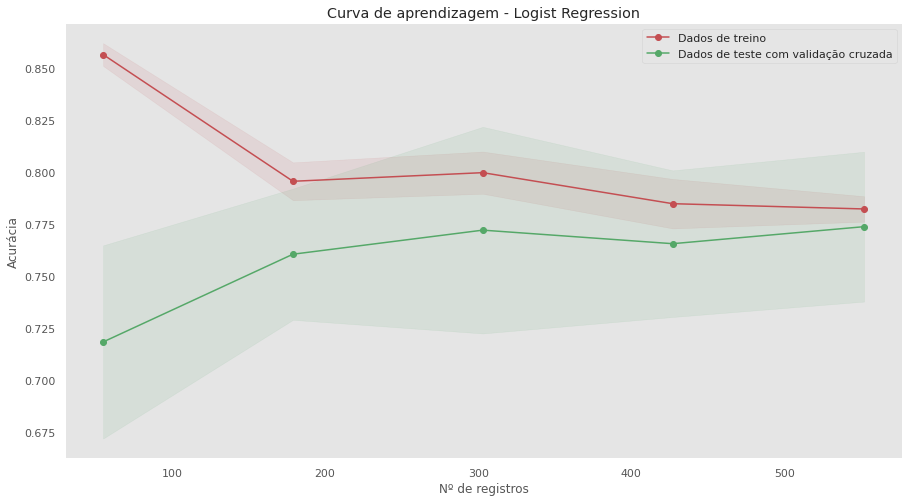

In [120]:
# plotando a curva de aprendizado do modelo "Logist Regression"
plot_learning_curve(model_logReg, title='Curva de aprendizagem - Logist Regression', 
                    X=X, y=y, cv=10, n_jobs=-1)
                     
plt.show()

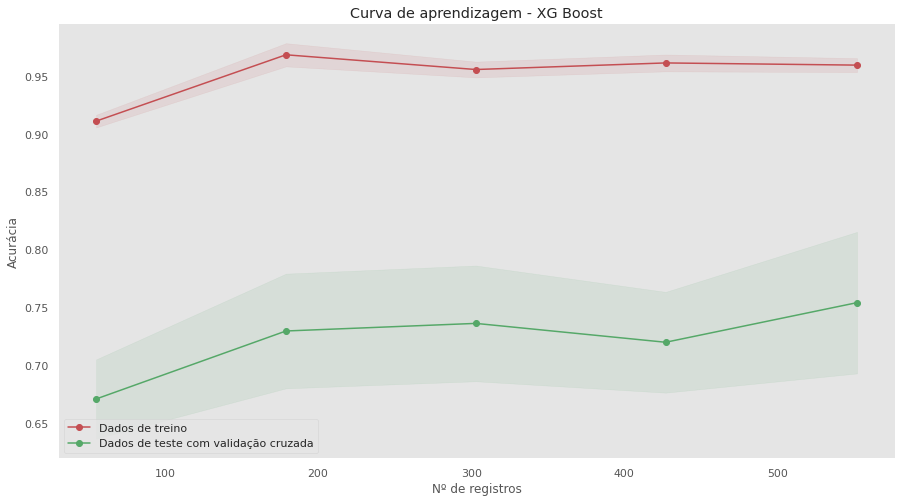

In [121]:
# plotando a curva de aprendizado do modelo "XG Boost"
plot_learning_curve(model_xgb, title='Curva de aprendizagem - XG Boost', 
                    X=X, y=y, cv=10, n_jobs=-1)
                     
plt.show()

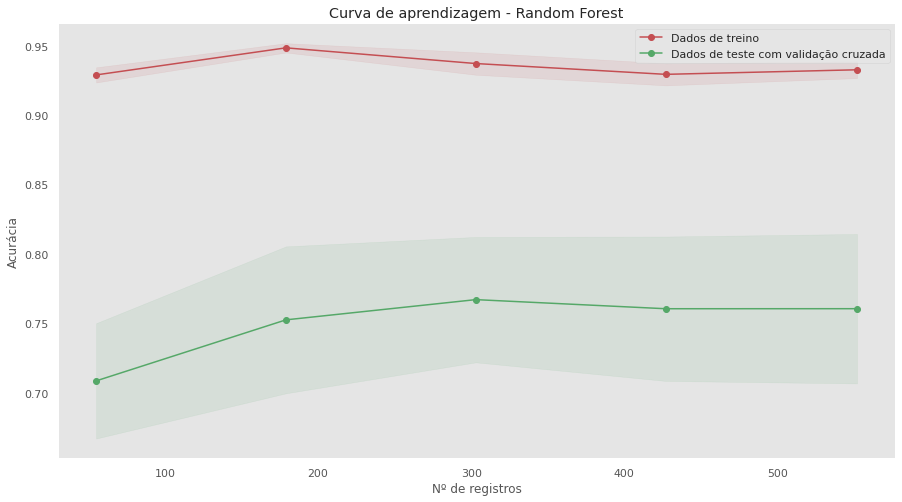

In [122]:
# plotando a curva de aprendizado do modelo "Random Forest"
plot_learning_curve(model_randFor, title='Curva de aprendizagem - Random Forest', 
                    X=X, y=y, cv=10, n_jobs=-1)
                     
plt.show()

In [123]:
# biblioteca para salvar serializado o modelo
import joblib as jl

In [124]:
# instanciando o modelo no objeto "model_logReg2.pkl"
jl.dump(model_logReg, 'model_logReg2.pkl')

['model_logReg2.pkl']

In [125]:
# visualizando o diretório principal
!ls

diabetes.csv  logRegr_model1.pkl  model_logReg2.pkl  sample_data


In [126]:
# instanciando o modelo no objeto "classifier_final"
classifier_final = jl.load('model_logReg2.pkl')
classifier_final   # visualizando o modelo

LogisticRegression(max_iter=1500, random_state=42)

In [131]:
# sorteando um dado aleatório do "data_test"
test = data_test.sample(1)
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
140,0,162.0,76.0,36.0,125.0,49.6,0.364,26,1


In [132]:
# excluindo o dado da variável "Outcome" e transformando os dados em um vetor (array)
test = test.drop('Outcome', axis=1).values
test

array([[  0.   , 162.   ,  76.   ,  36.   , 125.   ,  49.6  ,   0.364,
         26.   ]])

In [133]:
# realizando a predição com o modelo
classifier_final.predict(test)

array([1.])

In [134]:
# verificando as versões utilizadas
print('Versões utilizadas')
print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
# print(f'Sklearn: {sklearn.__version__}')
# print(f'Matplotlib: {matplotlib.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Imblearn: {imblearn.__version__}')

Versões utilizadas
Numpy: 1.19.5
Pandas: 1.1.5
Seaborn: 0.11.2
Imblearn: 0.8.1
